# 딥러닝 실습

## 폐암 수술 환자의 생존율 예측 

In [1]:
# 경고 무시
from warnings import filterwarnings
filterwarnings("ignore")

### 폐암 수술 환자의 생존율 예측 데이타셋 살펴보기
- 폐암 환자 수술 기록 데이터
- 총 470개 관측치, 17개 속성으로 구성
- 설명변수(X) – 16개, 종속변수(클래스, 레이블, Y) – 1개(1:생존, 0:사망)

<img src="./img/폐암환자데이타.jpg" align=left width=500>

### 1. 실행 환경 준비

In [ ]:
# 경고 무시
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# 모듈 불러오기
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense       
import numpy as np
import tensorflow as tf
tf.random.set_seed(0)

### 2. 데이터 준비

### 1) 데이타 불러오기

In [3]:
import pandas as pd
df = pd.read_csv("./data/ThoraricSurgery3.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1,3.88,2.12,1,0,0,0,1,0,2,0,0,0,1,0,63,0
466,2,3.76,3.12,0,0,0,0,0,0,0,0,0,0,1,0,61,0
467,2,3.04,2.08,1,0,0,0,1,0,2,0,0,0,0,0,52,0
468,2,1.96,1.68,1,0,0,0,1,1,1,0,0,0,1,0,79,0


### 2) 설명변수와 종속변수 나누기

In [4]:
X = df.iloc[:, 0:16]  # 설명변수(X) - 환자의 진찰 기록을 X로 지정
y = df.iloc[:, 16]    # 종속변수(y) - 수술후 생존: 1, 수술 후 사망: 0

In [5]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1,3.88,2.12,1,0,0,0,1,0,2,0,0,0,1,0,63
466,2,3.76,3.12,0,0,0,0,0,0,0,0,0,0,1,0,61
467,2,3.04,2.08,1,0,0,0,1,0,2,0,0,0,0,0,52
468,2,1.96,1.68,1,0,0,0,1,1,1,0,0,0,1,0,79


In [6]:
y 

0      0
1      0
2      0
3      0
4      1
      ..
465    0
466    0
467    0
468    0
469    0
Name: 16, Length: 470, dtype: int64

### 3) 데이타 시각화 

In [7]:
# 컬럼 이름 변경
df.rename(columns = {16:'label'}, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,label
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1,3.88,2.12,1,0,0,0,1,0,2,0,0,0,1,0,63,0
466,2,3.76,3.12,0,0,0,0,0,0,0,0,0,0,1,0,61,0
467,2,3.04,2.08,1,0,0,0,1,0,2,0,0,0,0,0,52,0
468,2,1.96,1.68,1,0,0,0,1,1,1,0,0,0,1,0,79,0


In [8]:
df['label'].value_counts()

0    400
1     70
Name: label, dtype: int64

<AxesSubplot:>

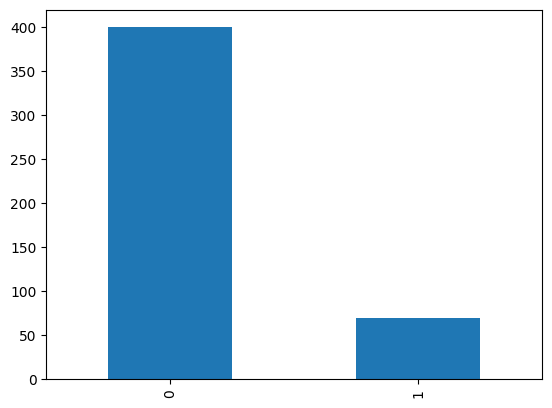

In [9]:
df['label'].value_counts().plot(kind='bar')

### 4) 학습 데이타셋과 테스트 데이타셋 구분하기

In [10]:
# 전체 데이타셋 = 학습 데이타셋 +  테스트셋으로 구분하기 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(376, 16) (376,)
(94, 16) (94,)


### 5) 학습 데이타 셋을 학습 데이타 셋과 검증 데이타셋으로 구분하기

In [12]:
# 학습데이타셋 = 학습데이셋 + 검증데이타셋으로 구분하기
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.2,
                                                  random_state=0)
# 나누어진 모든 데이타셋 형태 확인
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(300, 16) (300,)
(76, 16) (76,)
(94, 16) (94,)


### 3. 딥러닝 모델 정의
- 1) 입력층 : 입력변수가 16개, input_dim = 16 또는 input_shape = (16, )로 설정
- 2) 은닉층 : 30개의 노드, 활성화 함수는 relu로 설정
- 3) 출력층 
    - 출력 값이 1개, Dense의 노드 수를 1으로 설정
    - 출력층의 활성화 함수 : 이항 분류이므로 활성화함수를 sigmoid로 사용

In [13]:
model = Sequential()  # 딥러닝 모델의 구조 생성
model.add(Dense(30, input_dim = 16, activation='relu'))   # 입력층(16개의 입력) + 은닉층(30개 노드)
model.add(Dense(1, activation='sigmoid')) # 출력층(1개 출력) 

In [14]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


### 4. 컴파일 설정
- (1) loss 함수 : 이항 분류의 오차 함수인 binary_crossentropy 사용
- (2) 옵티마이저(최적화 함수) : adam 
- (3) 평가 지표 : 정확도(acuuracy)

In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']) 

### 5. 모델 훈련
- (1) epoch : 전체 샘플이 50회 반복 
- (2) batch_size : 한 번에 입력되는 값은 16개
- (3) 반복 횟수 : 470개 관측치 / 16개 배치 사이즈 = 29.375 = 30번, 각 에포크마다 30번 반복
- (4) 가중치 업데이트 총 횟수 : 에포크수 50회 * 각 에포크마다 30번 반복 = 1500번 업데이트
- (5) 검증 데이타셋을 이용한 검증 

In [16]:
history = model.fit(X_train, y_train, 
                    epochs=50, batch_size=16,
                    verbose=1,
                    validation_data=(X_val, y_val))

Epoch 1/50
19/19 [==============================] - 1s 13ms/step - loss: 7.5827 - accuracy: 0.1233 - val_loss: 3.3580 - val_accuracy: 0.1974
Epoch 2/50
19/19 [==============================] - 0s 3ms/step - loss: 1.6093 - accuracy: 0.4533 - val_loss: 0.6247 - val_accuracy: 0.7895
Epoch 3/50
19/19 [==============================] - 0s 3ms/step - loss: 0.5661 - accuracy: 0.8500 - val_loss: 0.7716 - val_accuracy: 0.7895
Epoch 4/50
19/19 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.8600 - val_loss: 0.6123 - val_accuracy: 0.8026
Epoch 5/50
19/19 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8733 - val_loss: 0.5280 - val_accuracy: 0.8026
Epoch 6/50
19/19 [==============================] - 0s 3ms/step - loss: 0.4241 - accuracy: 0.8733 - val_loss: 0.5027 - val_accuracy: 0.8026
Epoch 7/50
19/19 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8733 - val_loss: 0.5043 - val_accuracy: 0.8026
Epoch 8/50
19/19 [=

### 5. 모델 평가

In [17]:
model.evaluate(X_test, y_test, verbose=1)[1]

3/3 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.8085


0.8085106611251831

- 결과 해석)
- 테스트 데이타셋으로 정확도가 80.8%로 측정됨

### 6. 학습 과정 시각화 - 학습 데이타셋과 검증 데이타 셋 사용

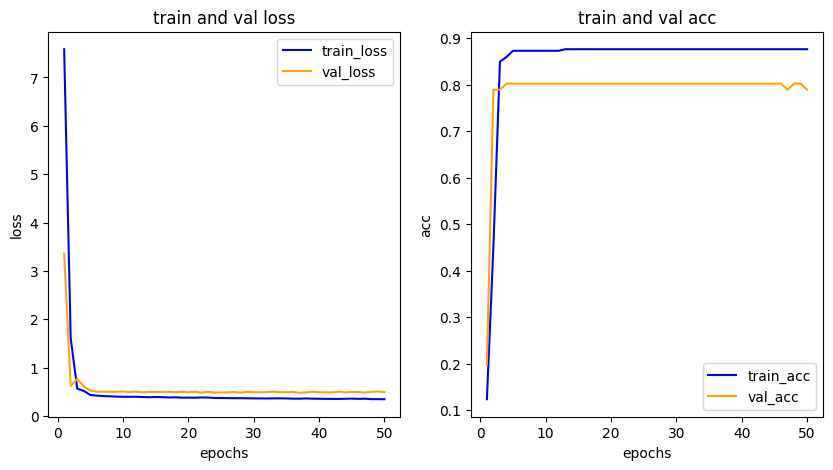

In [18]:
# 학습 상태를 그래프로 그리기 
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 
epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()
plt.show()

### 7. 예측

In [19]:
X_test[0:1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
311,2,2.4,1.64,1,0,1,0,1,1,1,0,0,0,0,0,62


In [20]:
y[0:1]

0    0
Name: 16, dtype: int64

In [21]:
model.predict([[2, 3.0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 50]])

1/1 [==============================] - 0s 95ms/step


array([[0.3828112]], dtype=float32)